# Pandas

### 1. Column을 조회하는 방법(단일, 복수, 범위)

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'https://bit.ly/TipsFile'
df = pd.read_csv(path)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# 데이터프레임.loc[행,열] 특정 행,열의 정보를 다 가져오는 상태
df.loc[:,'tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [7]:
# 특정 column의 정보를 가져오고 싶을때는 아래와 같은 방식으로도 가능하다.
df['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [10]:
# 여러 column을 조회하는 방식
df.loc[:,['tip', 'total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


In [11]:
# 아래와 같은 방식도 가능하다
df[['tip','total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


In [17]:
# 열 범위 조회하는 방법
# 범위 검색은 loc가 꼭 들어가야한다.
df.loc[:, 'tip':'day']

,tip,sex,smoker,day
0,1.01,Female,No,Sun
1,1.66,Male,No,Sun
2,3.50,Male,No,Sun
3,3.31,Male,No,Sun
4,3.61,Female,No,Sun
...,...,...,...,...
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat
242,1.75,Male,No,Sat


In [21]:
# tip에서 3번 row를 다 가져오는 형태

df.loc[3,:]

total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object

In [26]:
# tip의 size가 5인것을 다 가져오는 형태

df.loc[df['size'] == 5, :]

,total_bill,tip,sex,smoker,day,time,size
142,41.19,5.00,Male,No,Thur,Lunch,5
155,29.85,5.14,Female,No,Sun,Dinner,5
185,20.69,5.00,Male,No,Sun,Dinner,5
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5


In [31]:
# tip의 8$ 이상인 것을 가져오는 형태

df.loc[df['tip']>8, :]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


In [39]:
# 여러 조건을 사용해야하는 형태

# df.loc[(df['tip']>= 5) & (df['size'] < 4), :]
# 구문이 길어진다.

cond1 = df['tip'] >= 5
cond2 = df['size'] < 4

df.loc[cond1 & cond2, :] # 이 방식을 지향.

,total_bill,tip,sex,smoker,day,time,size
39,31.27,5.00,Male,No,Sat,Dinner,3
46,22.23,5.00,Male,No,Sun,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
88,24.71,5.85,Male,No,Thur,Lunch,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [40]:
# 앞서 정의한 조건을 다시 사용할 수 있다.
df.loc[cond1 | cond2, :]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [50]:
# DF에서 남자 고객만 추출하기, 추출 결과를 df2에 저장.

cond = df['sex'] == 'Male'
df2 = df.loc[cond,:]

In [51]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


###  2. isin(), between() 메소드

- isin([value1, value2, ... ]) : 값1 또는 값2, ... 인 데이터만 조회합니다.
- 여러개의 값을 조회할 수 있다.

In [53]:
df.loc[df['day'].isin(['Sat', 'Sun'])]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


- between(value1, value2) : 값1 ~ 값2까지 범위 안의 데이터만 조회합니다

In [54]:
df.loc[df['tip'].between(1,3)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
6,8.77,2.00,Male,No,Sun,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 3. reset_index()
- 메소드 초기화 과정
- reset_index(drop, inplace)
- drop : index 행 삭제 여부
- inplace : 바로 반영할것인지 여부

In [71]:
tmp = df.loc[df['total_bill'] > 30, :]
tmp

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
39,31.27,5.00,Male,No,Sat,Dinner,3
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
56,38.01,3.00,Male,Yes,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
83,32.68,5.00,Male,Yes,Thur,Lunch,2
85,34.83,5.17,Female,No,Thur,Lunch,4


In [72]:
tmp.reset_index(drop = True, inplace = True)

In [73]:
tmp

,total_bill,tip,sex,smoker,day,time,size
0,35.26,5.00,Female,No,Sun,Dinner,4
1,39.42,7.58,Male,No,Sat,Dinner,4
2,31.27,5.00,Male,No,Sat,Dinner,3
3,30.40,5.60,Male,No,Sun,Dinner,4
4,32.40,6.00,Male,No,Sun,Dinner,4
5,34.81,5.20,Female,No,Sun,Dinner,4
6,38.01,3.00,Male,Yes,Sat,Dinner,4
7,48.27,6.73,Male,No,Sat,Dinner,4
8,32.68,5.00,Male,Yes,Thur,Lunch,2
9,34.83,5.17,Female,No,Thur,Lunch,4


In [96]:
# 주말 데이터 조회, tmp는 기존 데이터에서 copy해서 가져오는 형태
tmp = df.loc[df['day'].isin(['Sat','Sun']), :].copy()
tmp

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [97]:
# total_bill로 정리, 내림차
tmp = tmp.sort_values(by = 'total_bill', ascending = False)
tmp.reset_index(drop = True, inplace=True)

In [98]:
tmp

,total_bill,tip,sex,smoker,day,time,size
0,50.81,10.00,Male,Yes,Sat,Dinner,3
1,48.33,9.00,Male,No,Sat,Dinner,4
2,48.27,6.73,Male,No,Sat,Dinner,4
3,48.17,5.00,Male,No,Sun,Dinner,6
4,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
158,8.77,2.00,Male,No,Sun,Dinner,2
159,7.74,1.44,Male,Yes,Sat,Dinner,2
160,7.25,5.15,Male,Yes,Sun,Dinner,2
161,7.25,1.00,Female,No,Sat,Dinner,1


In [99]:
# top10으로 tmp의 상위 10개를 가져옴
top10 = tmp.head(10)
top10

,total_bill,tip,sex,smoker,day,time,size
0,50.81,10.00,Male,Yes,Sat,Dinner,3
1,48.33,9.00,Male,No,Sat,Dinner,4
2,48.27,6.73,Male,No,Sat,Dinner,4
3,48.17,5.00,Male,No,Sun,Dinner,6
4,45.35,3.50,Male,Yes,Sun,Dinner,3
5,44.30,2.50,Female,Yes,Sat,Dinner,3
6,40.55,3.00,Male,Yes,Sun,Dinner,2
7,39.42,7.58,Male,No,Sat,Dinner,4
8,38.73,3.00,Male,Yes,Sat,Dinner,4
9,38.07,4.00,Male,No,Sun,Dinner,3


## 4. 데이터프레임 집계
- 해당 group에 대한 특정 데이터의 집계를 알고싶다.

In [100]:
top10.groupby('day', as_index=True)['tip'].sum()

day
Sat    38.81
Sun    15.50
Name: tip, dtype: float64

In [101]:
# tip의 total_bill의 sum을 구하고, top10['total_bill'].sum()
# day의 값으로 Grouping을 진행해라
# 그룹핑한 값을 index로 지정해라

top10.groupby(by='day')['total_bill'].sum()

day
Sat    269.86
Sun    172.14
Name: total_bill, dtype: float64

In [102]:
# 그룹핑한 값을 index로 지정하지 말자.
# 보통 이 방식을 많이 사용함
top10.groupby(by='day', as_index=False)['total_bill'].sum()

,day,total_bill
0,Sat,269.86
1,Sun,172.14


In [111]:
df.groupby(by='day')['total_bill'].sum()

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [113]:
df.sort_values(by='total_bill', ascending=False, inplace=True)

Text(0.5, 1.0, 'Good Lunch^^')

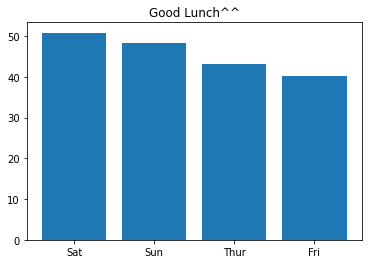

In [116]:
plt.bar(df['day'], df['total_bill'])
plt.title('Good Lunch^^')

<BarContainer object of 244 artists>

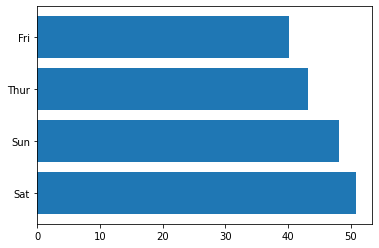

In [117]:
plt.barh(df['day'], df['total_bill'])

Text(0.5, 1.0, 'Total_bill, Tip')

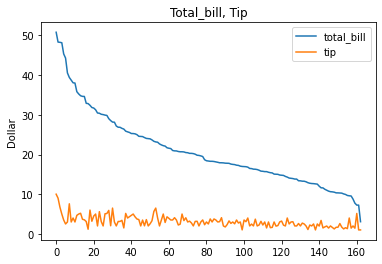

In [128]:
plt.plot(tmp['total_bill'])
plt.plot(tmp['tip'])
plt.legend(['total_bill','tip'])
plt.ylabel('Dollar')
plt.title('Total_bill, Tip')

In [135]:
# 전체 데이터에 대해서 total_bill, tip의 평균을 구해라
df[['total_bill', 'tip']].mean()

total_bill    19.785943
tip            2.998279
dtype: float64

In [142]:
# Day에 따라서 total_bill의 평균을 구해라
tmp = df.groupby(by='day', as_index=False)['total_bill'].mean()
tmp

,day,total_bill
0,Fri,17.151579
1,Sat,20.441379
2,Sun,21.410000
3,Thur,17.682742


In [146]:
# Time에 따라서 total_bill, tip에 대한 평균을 각각 구해라
tmp = df.groupby(by='time', as_index=False)[['total_bill','tip']].mean()
tmp

,time,total_bill,tip
0,Dinner,20.797159,3.102670
1,Lunch,17.168676,2.728088


In [148]:
# time, sex의 경우에수에 따라서 total_bill, tip의 평균값을 각각 구해라.
tmp = df.groupby(by=['time','sex'], as_index=False)[['total_bill','tip']].mean()
tmp

,time,sex,total_bill,tip
0,Dinner,Female,19.213077,3.002115
1,Dinner,Male,21.461452,3.144839
2,Lunch,Female,16.339143,2.582857
3,Lunch,Male,18.048485,2.882121
